# # Review: Week 1, 2 and mid week 3

## ## Week 1

## I) Edge detection

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
dt = datasets.load_digits()

In [3]:
# print(dt.DESCR)

In [4]:
len(dt.data), len(dt.target), len(dt.target_names), len(dt.images)

(1797, 1797, 10, 1797)

In [5]:
dt.data.shape

(1797, 64)

In [6]:
dt.target.shape

(1797,)

In [14]:
dt.images.shape

(1797, 8, 8)

In [15]:
no1 = dt.images[1]
no1_target = dt.target[1]

print('vector:\n{}\nlabel:{}'.format(no1, no1_target))

vector:
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
label:1


The above array would look like something like this:

![](media/1.png)

*(Check below to see that I got that right lol)*

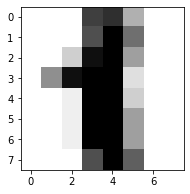

In [16]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

**Example: Vertical edge detection**

Define the edge detector:

In [17]:
v_edge_detector = np.array([
                        [1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]
])

Let's define helper functions:

In [18]:
# Walk over the picture

def stride(_image, _filter, add_stride=0):
    coords = []
    h = _image.shape[0]
    w = _image.shape[1]
    f_h = _filter.shape[0]
    f_w = _filter.shape[1]
    # Note that we don't need to set default stride value
    # of 1 because we are already iterating over the
    # lines and columns
    for line in range(h):
        for col in range(w):
            start = line, col
            end = line + f_h + add_stride, col + f_w + add_stride
            if end[0] <= h:
                if end[1] <=  w:
                    coords.append([start, end])
    return coords

Input dimension:

$n_{height}^{[l-1]}$ x $n_{width}^{[l-1]}$ x $n_{channels}^{[l-1]}$

Output dimension:

$n_{height}^{[l]}$ x $n_{width}^{[l]}$ x $n_{channels}^{[l]}$

**where**,

$n^{[l]} = floor([\frac{n^{[l]}+2*p^{[l]}-f}{s^{[l]}} +1]$)

**if** $height \neq width$, **then**

$n_{height}^{[l]} = floor([\frac{n_{height}^{[l]}+2*p^{[l]}-f}{s^{[l]}} +1]$)

**and**,

$n_{width}^{[l]} = floor([\frac{n_{width}^{[l]}+2*p^{[l]}-f}{s^{[l]}}+1]$)

In [19]:
# Perform the convolution
    
def conv2d(_image, _filter, add_stride=0, verbose=True):
    convs = []
    coords = stride(_image, _filter, add_stride)
    f_x = _filter.shape[0]
    f_y = _filter.shape[1]
    for c in coords:
        # start
        s_x = c[0][0]
        s_y = c[0][1]
        # end
        e_x = c[1][0]
        e_y = c[1][1]
        window = _image[s_x:e_x, s_y:e_y]
        conv = window * _filter
        det = np.sum(conv)
        convs.append(det)
        if verbose == True:
            print('Coords: {}'.format(c))
            print('Slice:\n{}'.format(window))
            print('Conv:\n{}'.format(conv))
            print('Sum: {}'.format(det) + '\n')
    # We need to save the results from each convolution
    # in our new convolution result matrix
    # The result matrix shall have height and width:
    # (h_prev - filter_h) + 1
    r_h = _image.shape[0] - f_x + 1
    r_w = _image.shape[1] - f_y + 1
    # Now, fill in the values from the convolution
    # into the result matrix
    r = np.array(convs).reshape(r_h, r_w)
    return r

**Case I**:

In [20]:
vertical_array = np.array([
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0]
    ])

vertical_array, vertical_array.shape

(array([[10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0]]), (6, 6))

In [21]:
vertical_conv = conv2d(vertical_array, v_edge_detector, verbose=False)
vertical_conv

array([[ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0]])

In [22]:
vertical_conv > 0

array([[False,  True,  True, False],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [False,  True,  True, False]])

**Case II**:

In [23]:
no1

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

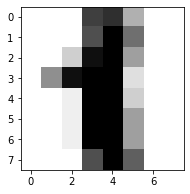

In [24]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [25]:
no1_conv_v = conv2d(no1, v_edge_detector, verbose=False)
no1_conv_v

array([[ -3., -38., -42.,  18.,  45.,  20.],
       [-18., -35., -30.,  25.,  48.,  17.],
       [-19., -40., -29.,  36.,  48.,  11.],
       [-17., -41., -31.,  37.,  48.,  11.],
       [ -3., -48., -45.,  33.,  48.,  15.],
       [ -2., -43., -46.,  21.,  48.,  22.]])

Applying the ReLU function:

In [55]:
def ReLU(x):
    return np.maximum(x, 0)

In [56]:
ReLU(no1_conv_v)

array([[ 0.,  0.,  0., 18., 45., 20.],
       [ 0.,  0.,  0., 25., 48., 17.],
       [ 0.,  0.,  0., 36., 48., 11.],
       [ 0.,  0.,  0., 37., 48., 11.],
       [ 0.,  0.,  0., 33., 48., 15.],
       [ 0.,  0.,  0., 21., 48., 22.]])

See how it captures the vertical edge?

Let's try it again applying a horizontal edge detector:

In [27]:
h_edge_detector = v_edge_detector.T
h_edge_detector

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [28]:
no1

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

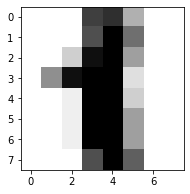

In [29]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [51]:
no1_conv_h = conv2d(no1, h_edge_detector, verbose=False)
no1_conv_h

array([[ -3.,  -6.,  -9.,  -7.,  -4.,  -1.],
       [-22., -27., -20.,   2.,   7.,   7.],
       [  2.,   1.,   1.,   2.,   3.,   3.],
       [ 21.,  21.,  14.,  -4.,  -4.,  -4.],
       [  0.,   0.,   0.,  -3.,  -3.,  -3.],
       [  1.,   6.,   6.,   1.,  -4.,  -4.]])

In [31]:
no1_conv_h > 0

array([[False, False, False, False, False, False],
       [False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False],
       [False, False, False, False, False, False],
       [ True,  True,  True,  True, False, False]])

___
We may also use the filter matrix values as parameters to be learned by backprop:

![](media/pback.png)

Just remember that the *Loss* will point out how fare we are from the actual target, and the learning rate together with the partial derivatives will update the weights, leading them to our goal of feature detection.

## II) Convolutions over volume

We will apply convolution in the following form:

$Image_{8x8x3} * Filter_{3x3x3} = Conv_{6x6}$

We need to apply it to each channel at the same time.

For each convolution, the output will be 2 dimensional:

![](media/3dconv.png)

**Example:**

In [32]:
from PIL import Image

In [33]:
image = Image.open('media/sunflower.jpeg')

Behold my mighty sunflower and its pixels:

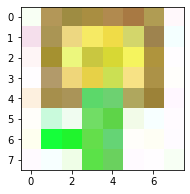

In [34]:
plt.figure(1, figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Notice it's three (RGB) channels

In [35]:
sunf = np.asarray(image)
sunf.shape

(8, 8, 3)

In [36]:
vert_detect_3d = np.array([
                            [
                                [1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]
                            ],
                            [
                                [1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]
                            ],
                            [
                                [1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]
                            ]
                        ])

vert_detect_3d.shape

(3, 3, 3)

In [37]:
hor_detect_3d = np.array([
                            [
                                [1, 1, 1],
                                [0, 0, 0],
                                [-1, -1, -1]
                            ],
                            [
                                [1, 1, 1],
                                [0, 0, 0],
                                [-1, -1, -1]
                            ],
                            [
                                [1, 1, 1],
                                [0, 0, 0],
                                [-1, -1, -1]
                            ]
                        ])

hor_detect_3d.shape

(3, 3, 3)

Helper functions:

In [38]:
def stride2d(_image, _filter, add_stride=0):
    coords = []
    x = 0
    y = 0
    z = 0

    f_h = _filter.shape[0]
    f_w = _filter.shape[1]
    f_z = _filter.shape[2]
    
    img_h = _image.shape[0]
    img_w = _image.shape[1]
    img_z = _image.shape[2]
        
    for line in range(img_h):

        if line + f_h <= img_h:
                x_start = line
                x_end = line + f_h

        for col in range(img_w):

            if col + f_w <= img_w:
                y_start = col
                y_end = col +  f_w

            coords.append([x_start, x_end, y_start, y_end])

        out = np.unique(coords, axis=0)
    return out   

In [39]:
def conv3d(_image, _filter, add_stride=0, verbose=False):
    convs = []
    sums = []
    coords = stride2d(_image, _filter)
    f_x = _filter.shape[0]
    f_y = _filter.shape[1]
    f_z = _filter.shape[2]
    for xyc in coords:
        # x
        s_x = xyc[0]
        e_x = xyc[1]
        # y
        s_y = xyc[2]
        e_y = xyc[3]
        cube = _image[s_x:e_x, s_y:e_y, :]
        conv = cube * _filter
        total = np.sum(conv)
        convs.append(total)
        sums.append(total)
        if verbose == True:
            print('Coords: [{}:{}, {}:{}, {}]'.format(s_x, e_x, s_y, e_y, ':'))
            print('Slice:\n{}'.format(cube))
            print('Conv:\n{}'.format(conv))
            print('Sum: {}'.format(total) + '\n')
    r_h = _image.shape[0] - f_x + 1
    r_w = _image.shape[1] - f_y + 1
    r = np.array(sums).reshape(r_h, r_w)
    
    return r

In [40]:
sunf_conv = conv3d(_image=sunf, _filter=vert_detect_3d, verbose=False)

In [41]:
sunf_conv, sunf_conv.shape

(array([[ 626,  992, 1128, 1173, 1073,  636],
        [ 628, 1054, 1231, 1264, 1116,  657],
        [ 627,  872,  872,  908,  940,  665],
        [ 377,  500,  495,  501,  536,  402],
        [ 153,  126,   94,  121,  200,  197],
        [ -49,  -13,   69,   89,   35,   19]]), (6, 6))

## III) Pooling

Helper functions:

In [42]:
def poolWindow(_in, _w_size):
    i_x = _in.shape[0]
    i_y = _in.shape[1]
    coords = []
    for x in range(i_x):
        for y in range(i_y):
            start = x, y
            end = x + _w_size, y + _w_size
            if end[0] <= i_x:
                if end[1] <= i_y:
                    coords.append([start, end])
    return coords

In [43]:
from math import floor

In [44]:
def maxPool(_in, _w_size, pretty=False):
    print('input shape = {}\n'.format(_in.shape))
    coords = poolWindow(_in, _w_size)
    pools = []
    output = ''
    for c in coords:
        x_start = c[0][0]
        x_end = c[1][0]
        y_start = c[0][1]
        y_end = c[1][1]
        window = _in[x_start:x_end, y_start:y_end]
        maxpool = np.max(window)
        pools.append(maxpool)
        if pretty == True:
            print('x: {} -> {}, y: {} -> {}'.format(x_start, x_end, y_start, y_end))
            print('window:\n{}'.format(window))
            print('max pool = {}\n'.format(maxpool))
    out_shape_x = floor((_in.shape[0] - _w_size) + 1)
    out_shape_y = floor((_in.shape[1] - _w_size) + 1)
    output = np.array(pools).reshape(out_shape_x,
                                     out_shape_y)
    print('output shape = {}'.format(output.shape))
    return output

In [45]:
# maxPool(sunf_conv, 3, True)
maxPool(sunf_conv, 3, False)

input shape = (6, 6)

output shape = (4, 4)


array([[1231, 1264, 1264, 1264],
       [1231, 1264, 1264, 1264],
       [ 872,  908,  940,  940],
       [ 500,  501,  536,  536]])

And there you have it!
___